### Tic-tac-toe<br>
learning by reinforcement<br>
Bernard Merialdo - June 2024

In [1]:
import random
import matplotlib.pyplot as plt

**description of some data structures used **

*   **board:** a string of 9 characters such as '..X.O...X'
*   **player:** 'X' or 'O' X plays first
*   **slot:** a number from 0 to 8 indicating the position on the board
*   **valueO:** a dictionary of values of a given state of the board for player O,
for example valuesO = {'.........':0, '..X.O...X':3}




In [2]:
#Commment the next line if you want different games each time you run the program
random.seed(10)

In [3]:
# alpha is the learning coefficient<br>
#alpha = 0.     # the player O is not learning, plays at random
alpha = 0.1

In [4]:
def Win(board, player):
    for line in [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8],[0,4,8],[2,4,6]]:
        if (board[line[0]]==player) and (board[line[1]]==player) and (board[line[2]]==player):
            return True
    return False

def Empty_slots(board):
    return [ x for x in range(len(board)) if board[x] == '.']

def Board_after_play(board,player,slot):
    return board[:slot] + player + board[slot + 1:]


In [5]:
# This is the definition of PlayerX, by default it plays randomly
def PlayerX(board):
    return random.choice(Empty_slots(board))
    # if you want to play against the computer, comment the previous line and uncomment the following line
    # return Human_player(board)

In [6]:
# this is the definition of PlayerO, by default it learns from the games
def PlayerO(board):
    listslots = [slot for slot in Empty_slots(board) if Board_after_play(board,'O',slot) in valuesO.keys()]
    values = [valuesO[Board_after_play(board,'O',slot)] for slot in listslots]
    if random.randrange(len(Empty_slots(board))) < len(values):
        return listslots[values.index(max(values))]
    return random.choice(Empty_slots(board))

In [7]:
# This is a function that asks the next move to a human player
# you can use it to modify the code and play against the computer
def Human_player(board):
    # display the current board
    Print_board(board)
    print('Where do you want X to play ?')
    while True:
        slot = int(input('Possible choices:'+str(Empty_slots(board))+':'))
        if slot in Empty_slots(board):
            return slot

def Other_player(player):
    if player == 'X':    return 'O'
    else:                return 'X'

In [8]:
# this is the functions that learns by updating the values of the possible boards according to the result of the game
def Update_valuesO(history,winner):
    if winner == 'O':
        reward = 1
    elif winner == '':
        reward = 0
    else:
        reward = -1
    if history[-1] in valuesO:
        valuesO[history[-1]] = 0
    else:
        valuesO[history[-1]] = 0
    for ih in range(len(history)-2,-1,-1):
        board = history[ih]
        next_board = history[ih+1]
        if board in valuesO.keys():
            valuesO[board] += alpha * (valuesO[next_board] + reward - valuesO[board])
        else:
            valuesO[board] = alpha * (valuesO[next_board] + reward)


In [9]:
# these are the functions to save and load the values to and from a file
def Save_values(values):
    with open('values.txt','w') as f:
        f.write('{')
        for key, value in values.items():
            f.write('"%s":%f,\n' % (key,value))
        f.write('}\n')

def Load_values(values):
    s = open('values.txt', 'r').read()
    values = eval(s)


In [10]:
# This function prints the status of the board
def Print_board(board):
    print('   '+board[0]+' ! '+board[1]+' ! '+board[2])
    print('  -----------')
    print('   '+board[3]+' ! '+board[4]+' ! '+board[5])
    print('  -----------')
    print('   '+board[6]+' ! '+board[7]+' ! '+board[8])


In [11]:
############################################
# start running the program from here

number_of_games_won = {'X':[0], 'O':[0]}
valuesO = {}

In [12]:
# uncomment next line if you want to read values that you saved before
#Load_values(valuesO)

In [13]:
# play a number of games
for game in range(2000):
    player = 'X'
    board = '.........'
    history = [board]
    winner = ''
    for _ in range(9):
        if player == 'X':
            slot = PlayerX(board)
        else:
            slot = PlayerO(board)
        board = Board_after_play(board,player,slot)
        history.append(board)
        if Win(board,player):
            print('the winner of game',game,'is',player)
            winner = player
            number_of_games_won[player].append(number_of_games_won[player][-1]+1)
            number_of_games_won[Other_player(player)].append(number_of_games_won[Other_player(player)][-1])
            Update_valuesO(history,winner)
            break

        player = Other_player(player)
    if winner == '':
        Update_valuesO(history,'')

the winner of game 0 is X
the winner of game 1 is O
the winner of game 2 is O
the winner of game 3 is X
the winner of game 4 is O
the winner of game 5 is X
the winner of game 6 is O
the winner of game 8 is X
the winner of game 9 is X
the winner of game 10 is O
the winner of game 11 is X
the winner of game 12 is O
the winner of game 13 is X
the winner of game 14 is X
the winner of game 15 is X
the winner of game 16 is X
the winner of game 17 is X
the winner of game 18 is O
the winner of game 20 is O
the winner of game 21 is X
the winner of game 22 is O
the winner of game 23 is X
the winner of game 24 is X
the winner of game 25 is X
the winner of game 26 is O
the winner of game 27 is X
the winner of game 28 is X
the winner of game 29 is X
the winner of game 30 is O
the winner of game 31 is O
the winner of game 32 is X
the winner of game 33 is O
the winner of game 34 is X
the winner of game 35 is X
the winner of game 36 is X
the winner of game 37 is X
the winner of game 38 is X
the winner

In [14]:
# uncomment the next 2 lines if you want to see the last board of the last game
#print('last board of last game')
#Print_board(board)

In [15]:
# uncomment the next line if you want to save the values in a file
#Save_values(valuesO)

In [16]:
# display the number of games won by each player
for player in ['X','O','X','X','X']:
    print(player,'won',number_of_games_won[player][-1],'games')

X won 747 games
O won 868 games


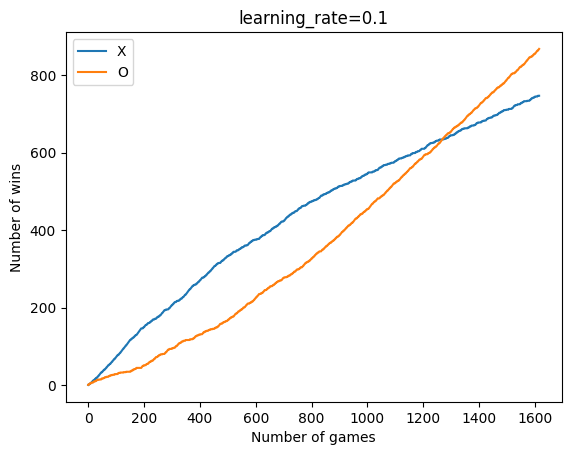

In [ ]:
# The following code plots the number of games won by each player after iterations
plt.plot(number_of_games_won['X'],label='X')
plt.plot(number_of_games_won['O'],label='O')
plt.legend()
plt.xlabel('Number of games')
plt.ylabel('Number of wins')
plt.title('learning_rate='+str(alpha))
plt.show()